In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

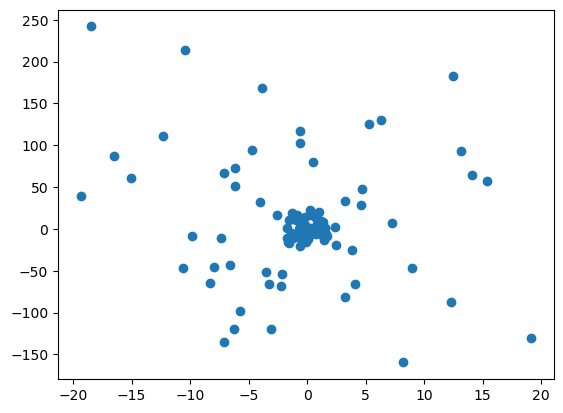

In [56]:
mu = np.array([0.0, 0.0])
cov = np.array([
    [1.0, 10.0], 
    [10.0, 100.0]
])
sample = 100

X = np.random.normal(mu, cov, size=(int(sample/2), 2, 2)).reshape(sample, 2)

plt.scatter(X[:, 0], X[:, 1])

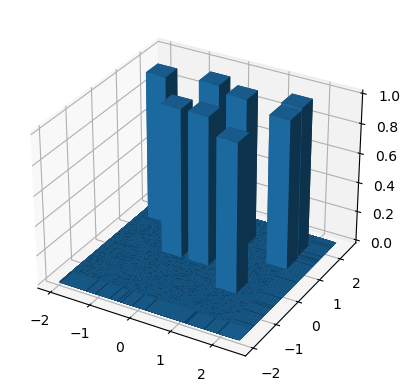

In [57]:
ax = plt.figure().add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(X[:, 0], X[:, 1], bins=100, range=[[-2, 2], [-2, 2]])

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

## Bivariate normals visualisation

Text(0.5, 1.0, '$\\mathrm{Cov}(X_1, X_2) < 0$')

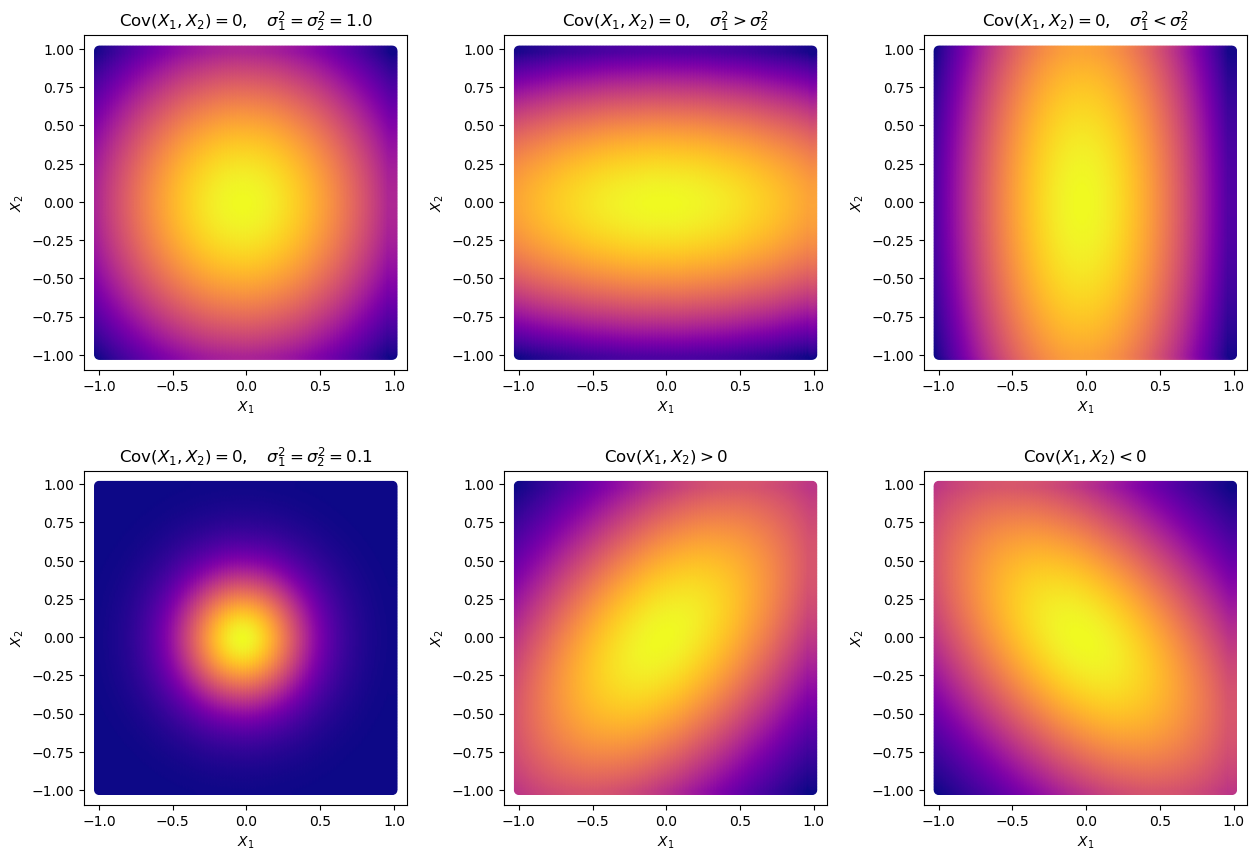

In [263]:
normal = lambda x, mu, cov: (1/((2*np.pi)**(cov.shape[0]/2) * np.linalg.det(cov)**0.5)) * np.exp(-0.5 * (x-mu).T @ np.linalg.pinv(cov) @ (x-mu))

XX, YY = np.mgrid[-1:1:0.01, -1:1:0.01]
X = np.vstack((XX.flatten(), YY.flatten())).T


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3, )
axes = axes.flatten()

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 1.0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [5.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[1].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 > \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 5.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[2].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[2].set_xlabel("$X_1$")
axes[2].set_ylabel("$X_2$")
axes[2].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 < \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [0.1, 0.0],
    [0.0, 0.1]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[3].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[3].set_xlabel("$X_1$")
axes[3].set_ylabel("$X_2$")
axes[3].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 0.1$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.5],
    [0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[4].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[4].set_xlabel("$X_1$")
axes[4].set_ylabel("$X_2$")
axes[4].set_title(r"$\mathrm{Cov}(X_1, X_2) > 0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, -0.5],
    [-0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[5].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[5].set_xlabel("$X_1$")
axes[5].set_ylabel("$X_2$")
axes[5].set_title(r"$\mathrm{Cov}(X_1, X_2) < 0$")

Text(0.5, 0.92, '$\\mathrm{Cov}(X_1, X_2) < 0$')

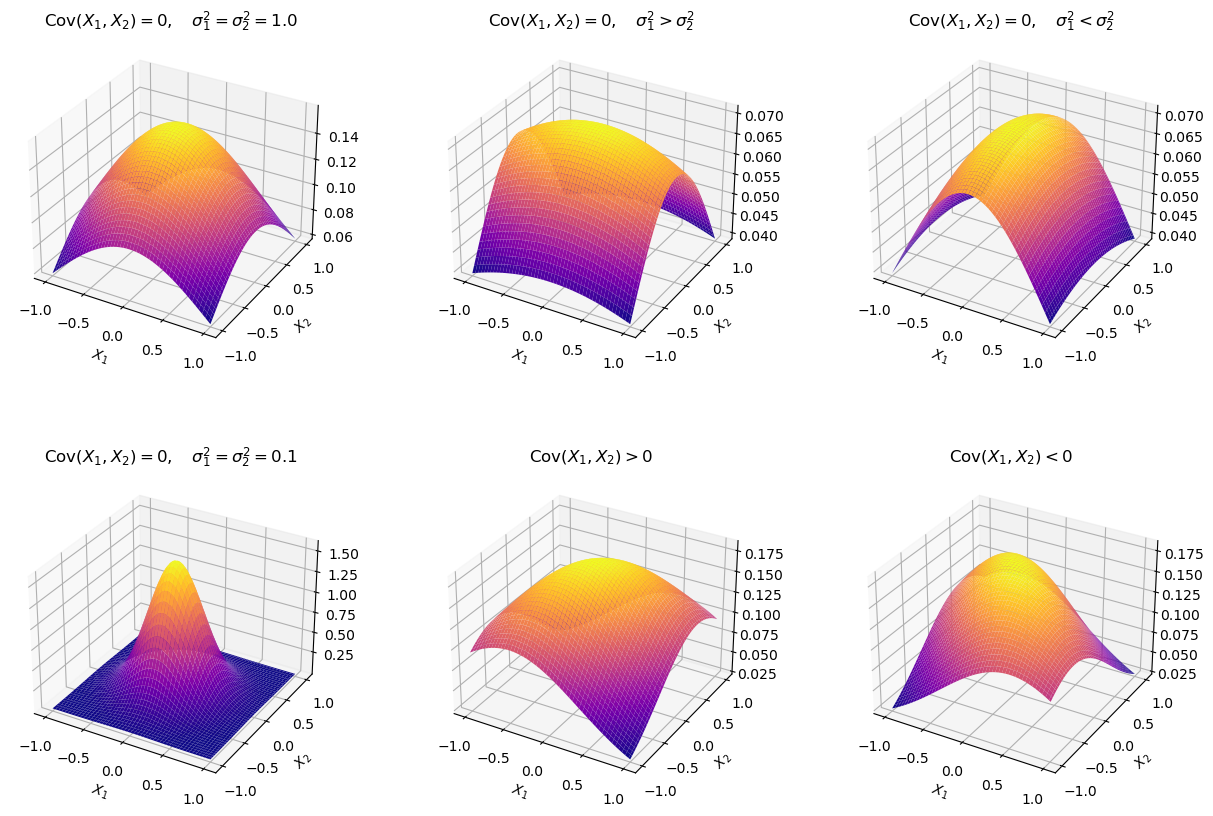

In [265]:
normal = lambda x, mu, cov: (1/((2*np.pi)**(cov.shape[0]/2) * np.linalg.det(cov)**0.5)) * np.exp(-0.5 * (x-mu).T @ np.linalg.pinv(cov) @ (x-mu))

dims = 100

XX, YY = np.meshgrid(np.linspace(-1, 1, dims), np.linspace(-1, 1, dims))
X = np.vstack((XX.flatten(), YY.flatten())).T

fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(projection="3d"))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

axes = axes.flatten()

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[0].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 1.0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [5.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[1].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 > \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 5.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[2].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[2].set_xlabel("$X_1$")
axes[2].set_ylabel("$X_2$")
axes[2].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 < \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [0.1, 0.0],
    [0.0, 0.1]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[3].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[3].set_xlabel("$X_1$")
axes[3].set_ylabel("$X_2$")
axes[3].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 0.1$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.5],
    [0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[4].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[4].set_xlabel("$X_1$")
axes[4].set_ylabel("$X_2$")
axes[4].set_title(r"$\mathrm{Cov}(X_1, X_2) > 0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, -0.5],
    [-0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[5].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[5].set_xlabel("$X_1$")
axes[5].set_ylabel("$X_2$")
axes[5].set_title(r"$\mathrm{Cov}(X_1, X_2) < 0$")


## Box-Muller transform
Transform two independent uniform random variables into two independent random variables with a standard normal distribution 

<AxesSubplot: ylabel='Count'>

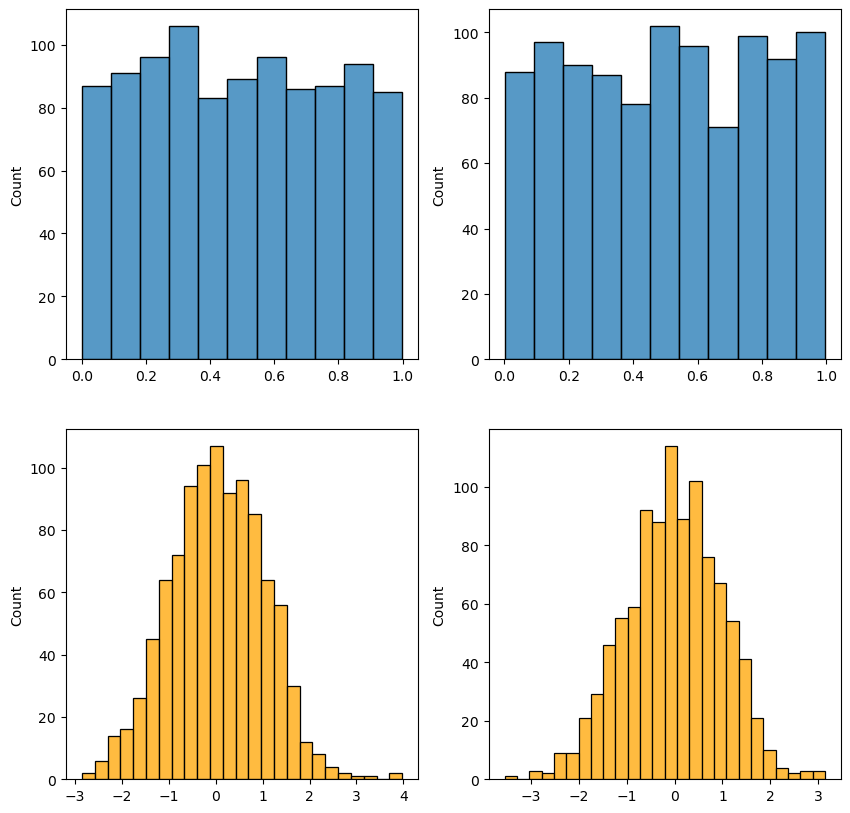

In [281]:
u1 = np.random.uniform(0.0, 1.0, size=1000)
u2 = np.random.uniform(0.0, 1.0, size=1000)

z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2*np.pi*u2)
z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2*np.pi*u2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(u1, ax=axes[0][0])
sns.histplot(u2, ax=axes[0][1])
sns.histplot(z0, ax=axes[1][0], color='orange')
sns.histplot(z1, ax=axes[1][1], color='orange')
# plt.hist(z1)